# Task 1 - Stock Price Prediction Model 
In this task we are using LSTM model. Long Short-Term Memory (LSTM) neural networks are a type of recurrent neural network (RNN) architecture designed to capture and remember long-term dependencies in sequential data. LSTMs are particularly well-suited for time series prediction tasks, making them a popular choice for financial market analysis, including stock price prediction.

In [3]:
import numpy as np 
import pandas as pd

df= pd.read_csv("BTCUSDT-1m-2023-11.csv")
del df['ignore']
del df['taker_buy_quote_volume']
del df['taker_buy_volume']
del df['count']
del df['quote_volume']
del df['close_time']


df['open_time']=pd.to_datetime(df['open_time'],unit='ms')
df.head(50)

,open_time,open,high,low,close,volume
0,2023-11-01 00:00:00,34651.4,34676.5,34650.0,34669.9,376.040
1,2023-11-01 00:01:00,34669.9,34684.0,34637.3,34637.4,431.177
2,2023-11-01 00:02:00,34637.4,34653.4,34632.5,34651.4,175.894
3,2023-11-01 00:03:00,34651.3,34651.4,34608.6,34621.1,476.587
4,2023-11-01 00:04:00,34621.1,34622.6,34592.0,34615.4,546.312
5,2023-11-01 00:05:00,34615.4,34622.2,34594.3,34599.4,355.038
6,2023-11-01 00:06:00,34599.3,34624.1,34596.3,34619.8,198.222
7,2023-11-01 00:07:00,34619.8,34673.1,34619.8,34655.3,288.270
8,2023-11-01 00:08:00,34655.2,34665.4,34631.7,34638.0,370.309
9,2023-11-01 00:09:00,34638.1,34656.0,34606.6,34611.6,307.002


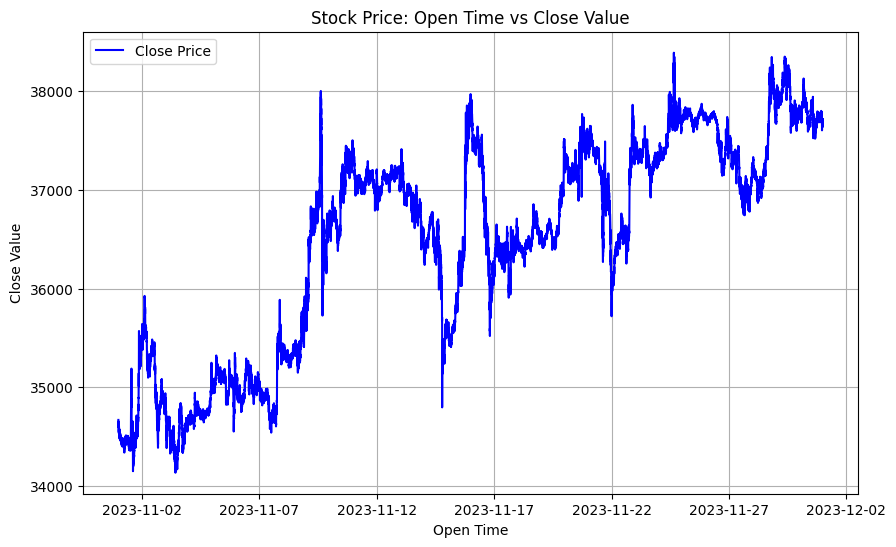

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(10, 6))
plt.plot(df['open_time'], df['close'], color='b', label='Close Price')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Stock Price: Open Time vs Close Value')
plt.xlabel('Open Time')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [7]:
target_y = df['close']
df.set_index('open_time', inplace=True)
X_feat = df.iloc[:,1:5]

#Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft, index=X_feat.index)
X_ft

,high,low,close,volume
open_time,,,,
2023-11-01 00:00:00,-1.691689,-1.694644,-1.687282,0.392349
2023-11-01 00:01:00,-1.684749,-1.706397,-1.717360,0.518425
2023-11-01 00:02:00,-1.713065,-1.710839,-1.704403,-0.065304
2023-11-01 00:03:00,-1.714916,-1.732957,-1.732445,0.622259
2023-11-01 00:04:00,-1.741566,-1.748319,-1.737720,0.781692
...,...,...,...,...
2023-11-30 23:55:00,1.107919,1.126670,1.115686,-0.401001
2023-11-30 23:56:00,1.104958,1.124263,1.113373,-0.453618
2023-11-30 23:57:00,1.102552,1.120376,1.109486,-0.411968


# Creating a custom function to adjust the number past days data we are taking to predict today's close price 

In [8]:
def lstm_split(data, n_steps):
    X,y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1, -1])
    return np.array(X), np.array(y)

Spliting the dataset into train and test set 

In [11]:
X1,y1 = lstm_split(X_ft.values, n_steps=2)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = X_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx: ]
y_train, y_test = y1[:split_idx], y1[split_idx: ]
X_train_date, x_test_date = date_index[:split_idx], date_index[split_idx:-1 ]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)


(43199, 2, 3) (34560, 2, 3) (8639, 2, 3) (8639,)


# Creating the LSTM neural network to fit the data features

In [26]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu',return_sequences=True))  # Remove return_sequences=True
lstm.add(LSTM(50, activation='relu', return_sequences=False))  
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 50)             10800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31051 (121.29 KB)
Trainable params: 31051 (121.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model = lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)


Epoch 1/100
8640/8640 - 44s - loss: 1.1101 - 44s/epoch - 5ms/step
Epoch 2/100
8640/8640 - 40s - loss: 1.0962 - 40s/epoch - 5ms/step
Epoch 3/100
8640/8640 - 41s - loss: 1.0977 - 41s/epoch - 5ms/step
Epoch 4/100
8640/8640 - 41s - loss: 1.0784 - 41s/epoch - 5ms/step
Epoch 5/100
8640/8640 - 41s - loss: 1.0668 - 41s/epoch - 5ms/step
Epoch 6/100
8640/8640 - 41s - loss: 1.0015 - 41s/epoch - 5ms/step
Epoch 7/100
8640/8640 - 41s - loss: 0.8305 - 41s/epoch - 5ms/step
Epoch 8/100
8640/8640 - 41s - loss: 0.6547 - 41s/epoch - 5ms/step
Epoch 9/100
8640/8640 - 41s - loss: 0.4068 - 41s/epoch - 5ms/step
Epoch 10/100
8640/8640 - 40s - loss: 0.3194 - 40s/epoch - 5ms/step
Epoch 11/100
8640/8640 - 41s - loss: 0.2979 - 41s/epoch - 5ms/step
Epoch 12/100
8640/8640 - 40s - loss: 0.2908 - 40s/epoch - 5ms/step
Epoch 13/100
8640/8640 - 41s - loss: 0.2960 - 41s/epoch - 5ms/step
Epoch 14/100
8640/8640 - 40s - loss: 0.2905 - 40s/epoch - 5ms/step
Epoch 15/100
8640/8640 - 41s - loss: 0.2724 - 41s/epoch - 5ms/step
Epoc

In [28]:
y_pred = lstm.predict(X_test)
y_pred

270/270 [==============================] - 1s 2ms/step


array([[-0.30948573],
       [-0.2983179 ],
       [-0.30942836],
       ...,
       [-0.31328395],
       [-0.30898142],
       [-0.25791174]], dtype=float32)

# Mean Squared Error and Mean Absolute Percentage Error of the Training Set

In [29]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ",mape)

RMSE:  0.38807881379043113
MAPE:  1.63889178375241


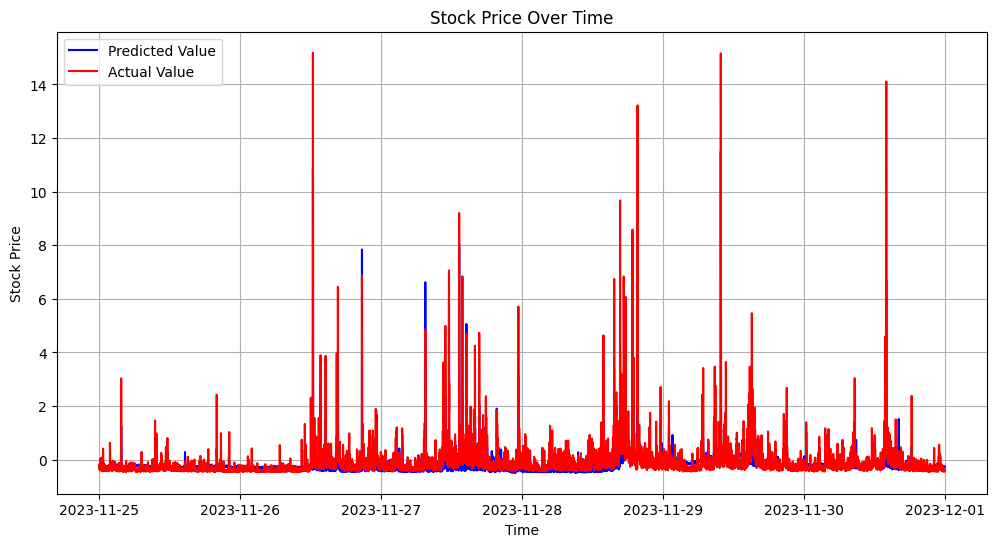

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(x_test_date,y_pred, label='Predicted Value', color='blue')
plt.plot(x_test_date,y_test, label='Actual Value', color='red')
plt.title('Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
y_initial = lstm.predict(X_train)

1080/1080 [==============================] - 2s 2ms/step


# Mean Squared Error and Mean Absolute Percentage Error of the Training Set

In [ ]:
rmse = mean_squared_error(y_train_test, y_train, squared=False)
mape = mean_absolute_percentage_error(y_train_test, y_train)
print("RMSE: ",rmse)
print("MAPE: ",mape)

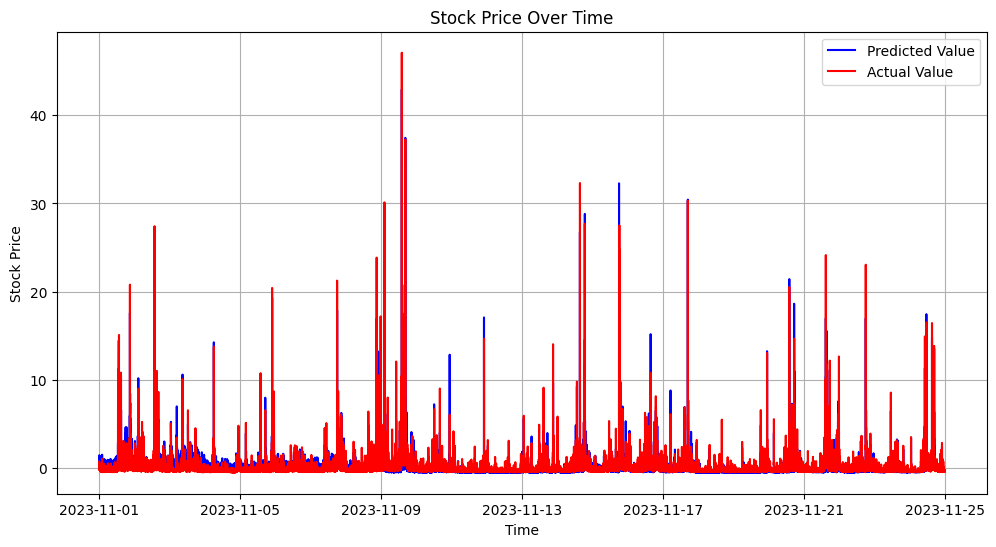

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(X_train_date,y_initial, label='Predicted Value', color='blue')
plt.plot(X_train_date,y_train, label='Actual Value', color='red')
plt.title('Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly Detection Using Isolation Forest Algorithm
Isolation Forest is an anomaly detection algorithm that efficiently identifies outliers (anomalies) in a dataset. The main idea behind Isolation Forest is to isolate anomalies by identifying features that make them stand out.

In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df= pd.read_csv("/kaggle/input/dataset/BTCUSDT-1m-2023-11.csv")

features = df[['open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume']]

X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Model Training and fitting it to the training set

In [29]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_train)

df['anomaly'] = model.predict(features)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# Plotting the Anomalies with the Close prices

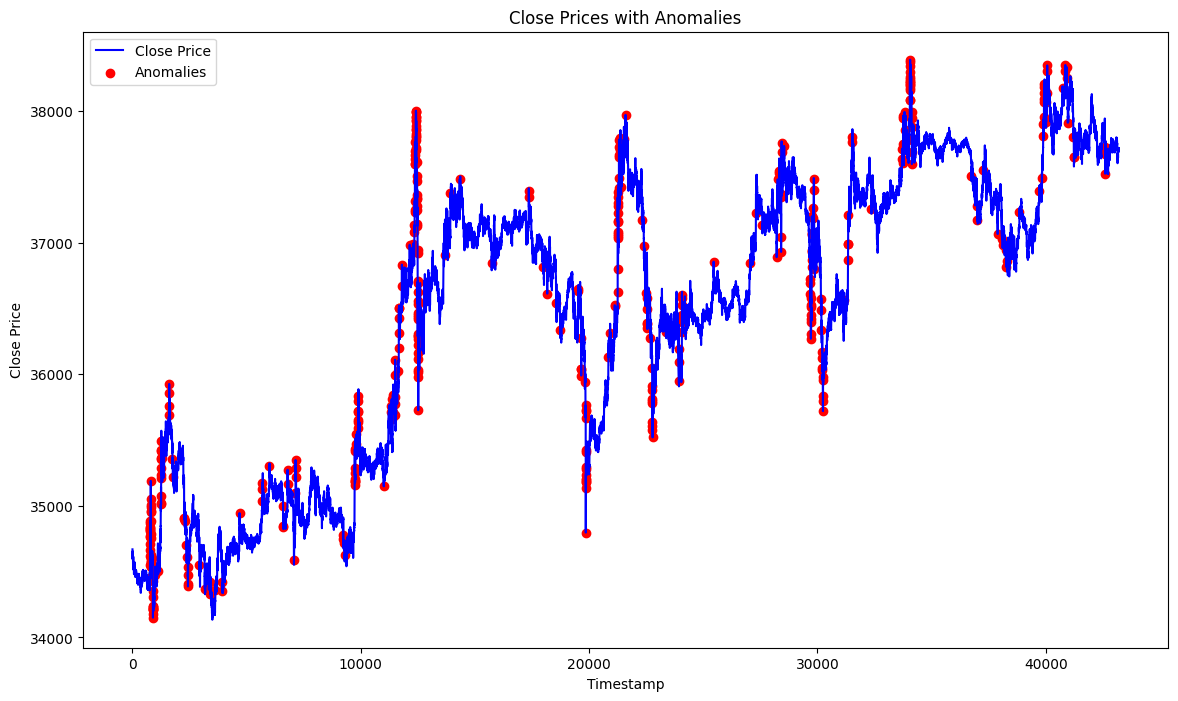

In [30]:
plt.figure(figsize=(14, 8))

plt.plot(df['close'], label='Close Price', color='blue')

anomaly_points = df[df['anomaly'] == -1]
plt.scatter(anomaly_points.index, anomaly_points['close'], marker='o', color='red', label='Anomalies')

plt.title('Close Prices with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Generating Buy and Sell signal based on the historical data and Creating Classification Model
This example generates trading signals based on a simple criteria: buying when the predicted price is higher than the previous day's closing price and selling when the predicted price is lower

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = df[['open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume']]

df['target'] = (df['close'].shift(-1) > df['close']).astype(int)

df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(features[:-1], df['target'][:-1], test_size=0.2, random_state=42)

In [35]:
# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

df['signal'] = 'hold'
df.loc[df['target'] == 1, 'signal'] = 'buy'
df.loc[df['target'] == 0, 'signal'] = 'sell'

Model Accuracy: 51.03%


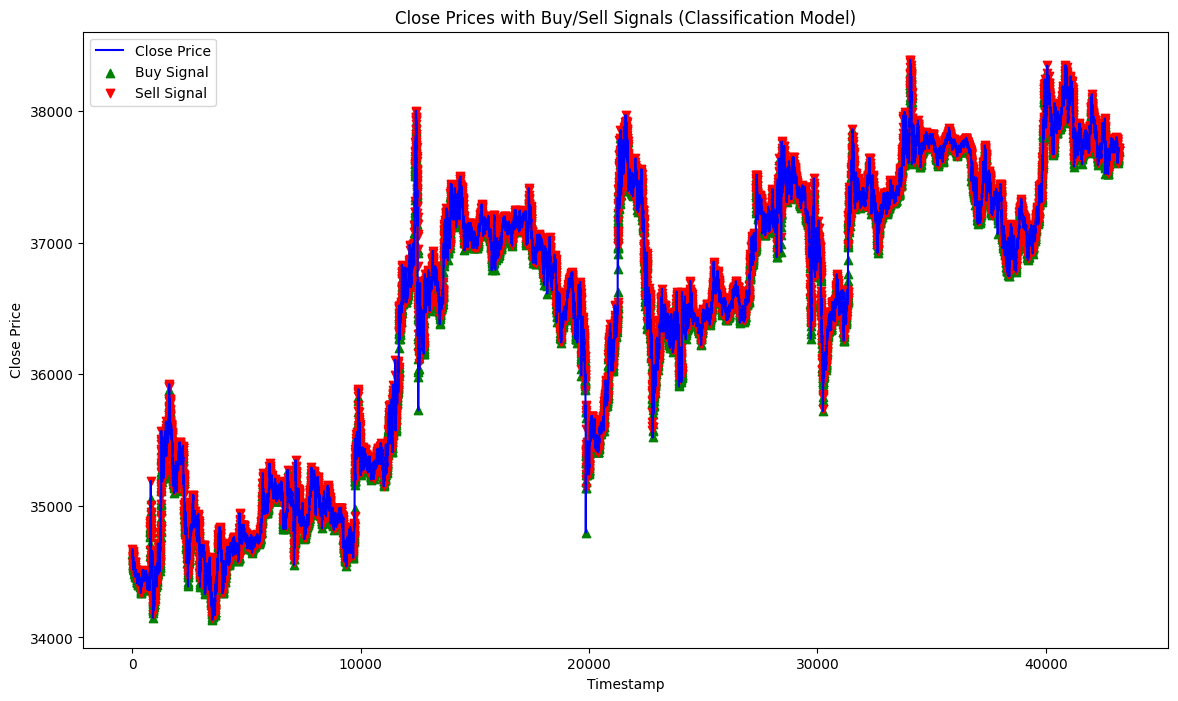

In [36]:
plt.figure(figsize=(14, 8))

plt.plot(df['close'], label='Close Price', color='blue')

buy_points = df[df['signal'] == 'buy']
plt.scatter(buy_points.index, buy_points['close'], marker='^', color='green', label='Buy Signal')

sell_points = df[df['signal'] == 'sell']
plt.scatter(sell_points.index, sell_points['close'], marker='v', color='red', label='Sell Signal')

plt.title('Close Prices with Buy/Sell Signals (Classification Model)')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()
